In [1]:
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import AxesImage, NonUniformImage
import numpy as np
import math
import random
from scipy.interpolate import interp1d
#from PIL import Image # pillow
#import cv2 #opencv
from lib import find_nearest_index, get_offset_x, FigureSize



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
NEON_REFERENCE_FILE = "linetable-Ne.csv"
WAVELENGTHS_MIN, WAVELENGTHS_MAX = 4000, 9000
WINDOW = 256
STEPSIZE_MIN, STEPSIZE_MAX, STEPSIZE_N = 0.5, 1.5, 2000

In [3]:
def scale(min_scale, max_scale):
    return random.random()*(max_scale - min_scale)+0.95

In [4]:
def gauss():
    return random.gauss(1.0,0.3)

In [5]:
neon_reference_file = os.path.join(NEON_REFERENCE_FILE)
positions = {'wavelength':2, 'intensity':6, 'selector':1}
selector = '1'
intensity_limit = 1.0
neon_wavelengths = []
neon_intensities = []

with open(neon_reference_file,'r') as neon_f:
    for line in neon_f:
        if line.startswith('#'):
            pass
        else:
            tokens =  line.split(';')
            #print (tokens)
            try:
                if selector in tokens[positions['selector']] :
                    
                    neon_wavelength, neon_intensity = float(tokens[positions['wavelength']]), float(tokens[positions['intensity']])
                    
                    if neon_intensity > intensity_limit :
                        
                        neon_wavelengths.append(neon_wavelength)
                        neon_intensities.append(neon_intensity)
                        
                        print ("{:8.3f} {:10.0f}".format(neon_wavelength, neon_intensity, ))
                    
            except ValueError:
                pass

print (len(neon_wavelengths), len(neon_intensities))

0 0


In [6]:
neon_reference_file = 'linetable-NE.csv'
positions = {'wavelength':0, 'intensity':2}
neon_wavelengths = []
neon_intensities = []

with open(neon_reference_file,'r') as neon_f:
    for line in neon_f:
        if line.startswith('#'):
            pass
        else:
            tokens =  line.split(';')
            print (tokens)
            try:
                neon_wavelength, neon_intensity = float(tokens[positions['wavelength']]), float(tokens[positions['intensity']])
                neon_wavelengths.append(neon_wavelength)
                neon_intensities.append(neon_intensity)
                
                print ("{:8.3f} {:10.0f}".format(neon_wavelength, neon_intensity, ))
                
                        
            except ValueError:
                pass

print (len(neon_wavelengths), len(neon_intensities))
#
# print (neon_wavelengths)

['3417.9035  ', ' Ne I ', ' \n']
['3472.5711  ', ' Ne I ', ' \n']
['3515.1900  ', ' Ne I ', ' \n']
['3593.5263  ', ' Ne I ', ' \n']
['3600.1691  ', ' Ne I ', ' \n']
['4488.0926  ', ' Ne I ', ' \n']
['4636.125   ', ' Ne I ', ' \n']
['4837.3139  ', ' Ne I ', ' \n']
['5005.1587  ', ' Ne I ', ' \n']
['5031.3504  ', ' Ne I ', ' \n']
['5104.7011  ', ' Ne I ', ' \n']
['5113.6724  ', ' Ne I ', ' \n']
['5144.9384  ', ' Ne I ', ' \n']
['5188.6122  ', ' Ne I ', ' \n']
['5330.7775  ', ' Ne I ', ' \n']
['5341.0938  ', ' Ne I ', ' \n']
['5360.0121  ', ' Ne I ', ' \n']
['5400.5617  ', ' Ne I ', ' \n']
['5562.7662  ', ' Ne I ', ' \n']
['5656.5664  ', ' Ne I ', ' \n']
['5689.8163  ', ' Ne I ', ' \n']
['5719.2248  ', ' Ne I ', ' \n']
['5748.2985  ', ' Ne I ', ' \n']
['5764.4188  ', ' Ne I ', ' \n']
['5804.4496  ', ' Ne I ', ' \n']
['5820.1558  ', ' Ne I ', ' \n']
['5852.4878  ', ' Ne I ', '   1573\n']
5852.488       1573
['5881.895   ', ' Ne I ', '   201\n']
5881.895        201
['5944.8342  ', ' Ne I ',

In [7]:
plt.rcParams['figure.figsize'] = FigureSize.NARROW

In [8]:
wavelengths = np.array(range(WAVELENGTHS_MIN,WAVELENGTHS_MAX,1))*1.0
intensities = wavelengths * 0.0
sigma = 4.0
k = -2*sigma*sigma
r = math.sqrt(2*math.pi*sigma*sigma)

for neon_w, neon_i, in zip(neon_wavelengths, neon_intensities):

    _e = (wavelengths - neon_w)*(wavelengths- neon_w) / k
    intensities = intensities + np.exp(_e) * neon_i
        


In [9]:
xlim = [wavelengths[1], wavelengths[-2]]

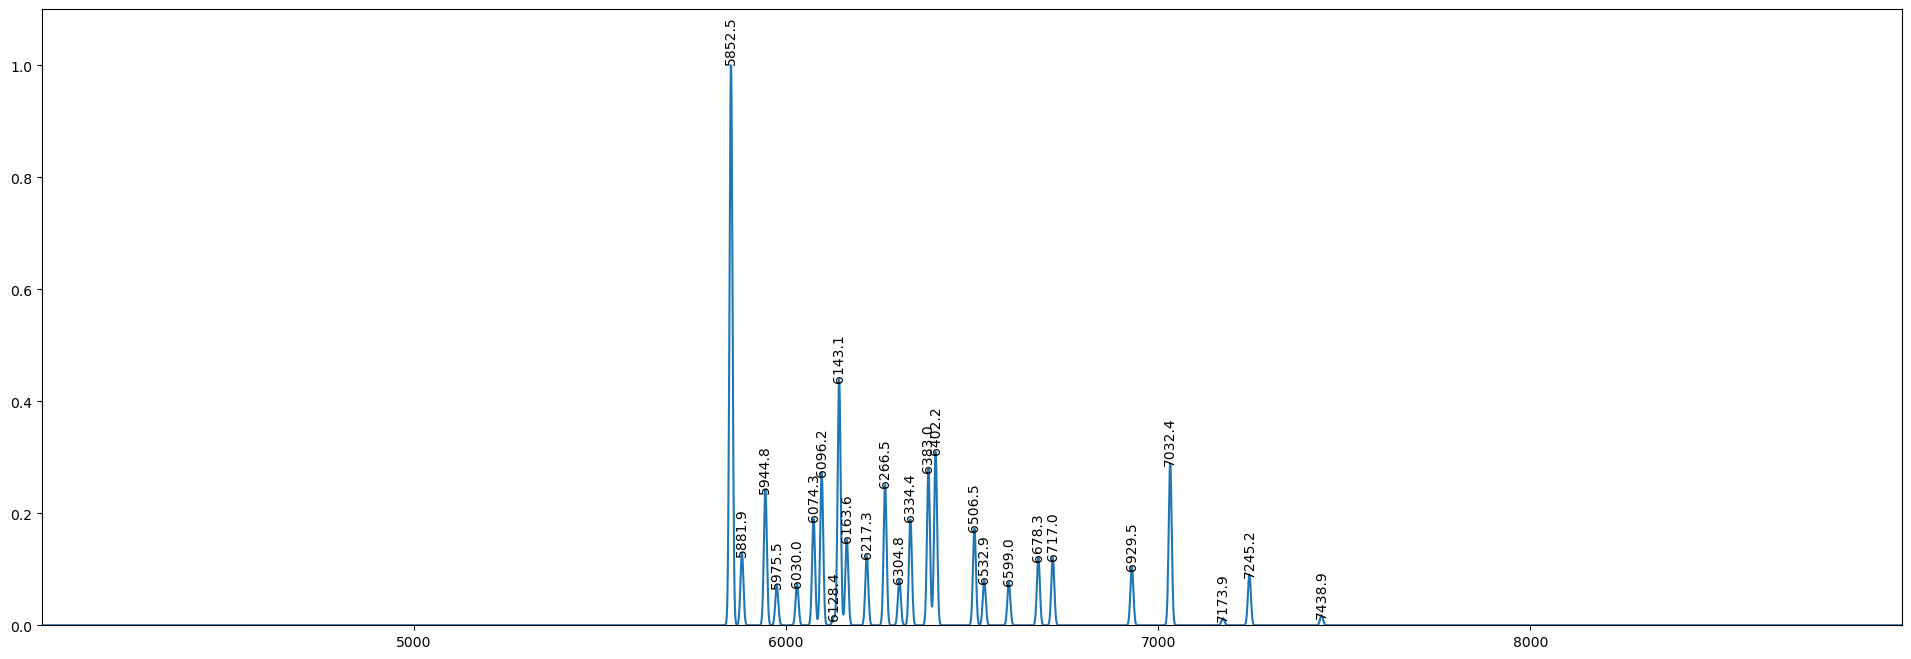

In [10]:
plt.rcParams['figure.figsize'] = FigureSize.NARROW
xlim = [wavelengths[1], wavelengths[-2]]
_i1 = find_nearest_index(wavelengths,xlim[0])
_i2 = find_nearest_index(wavelengths,xlim[1])
#print (_i1[0], _i2[0])
max_i = intensities[_i1:_i2].max()
normalized_intensities = intensities / max_i
fig, ax = plt.subplots()

plt.plot(wavelengths, normalized_intensities)
for _nw, _ni in zip(neon_wavelengths, neon_intensities):
    plt.text(_nw,_ni/max_i,"{:6.1f}".format(_nw), rotation=90, horizontalalignment='center')
plt.xlim(xlim)
plt.ylim(0,1.1)
plt.show()

In [11]:
plt.rcParams['figure.figsize'] = FigureSize.MEDIUM

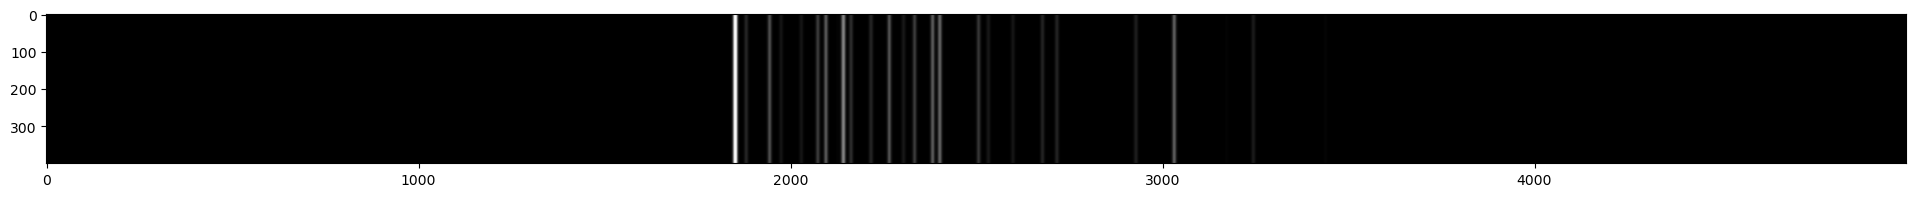

In [12]:
n_x = len(wavelengths)
n_y = 400
img = np.zeros((n_y,n_x))
for _y in range(n_y):
    img[_y,:] = normalized_intensities
fig, axes = plt.subplots()
plt.imshow(img, cmap=plt.cm.Greys_r)

In [13]:
raw = img[:,2500:3700]

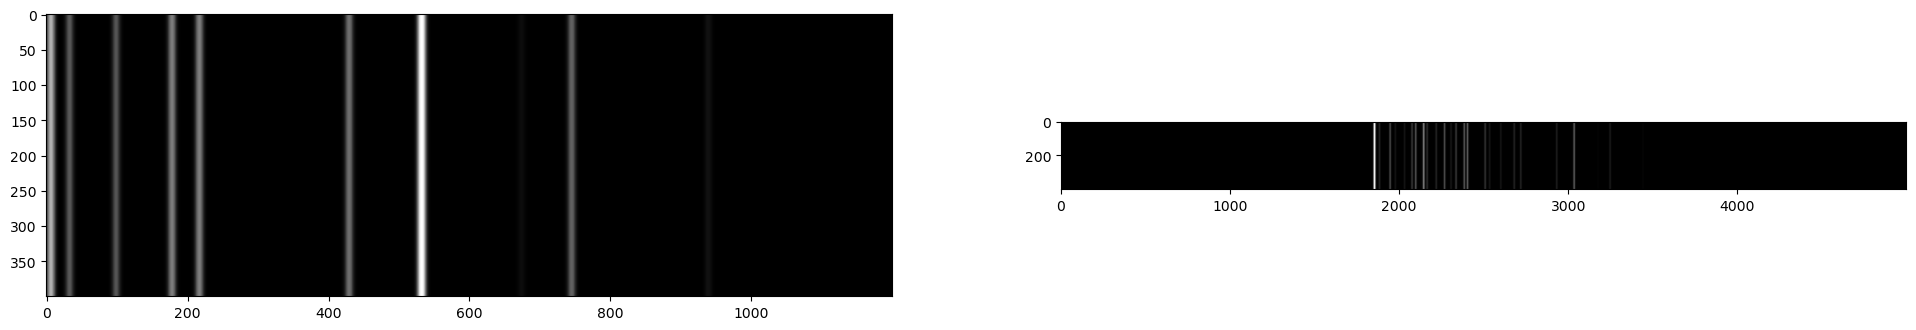

In [14]:
plt.rcParams['figure.figsize'] = FigureSize.NARROW
fig, axes = plt.subplots(1,2)
axes[0].imshow(raw, cmap=plt.cm.Greys_r)
axes[1].imshow(img, cmap=plt.cm.Greys_r)
plt.show()

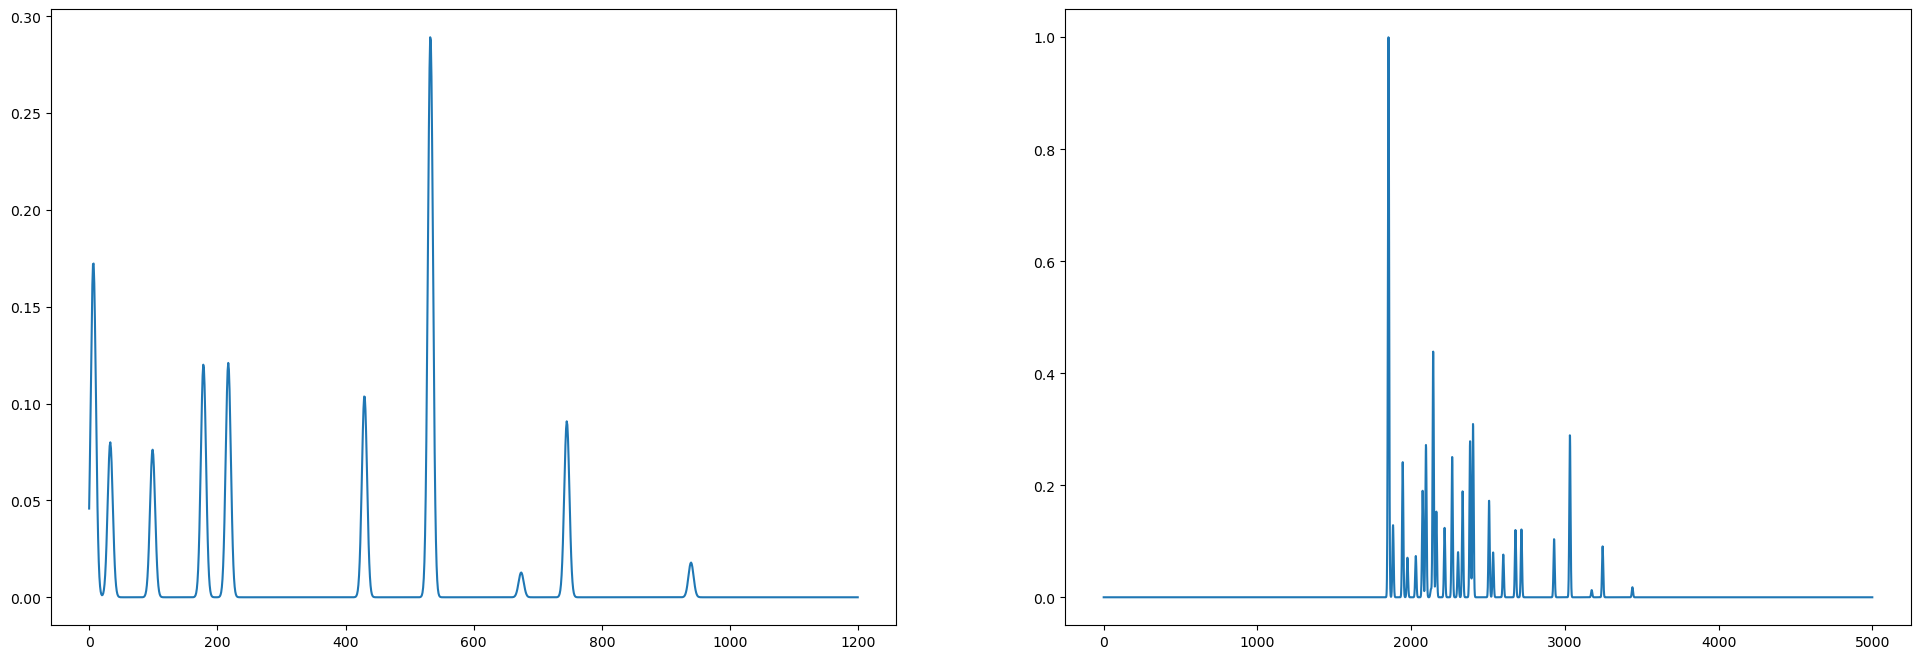

In [ ]:
trace_reference = img[200,:]
trace_unknown = raw[200,:]
plt.rcParams['figure.figsize'] = FigureSize.NARROW
fig, axes = plt.subplots(1,2)
axes[0].plot(trace_unknown)
axes[1].plot(trace_reference)
plt.show()

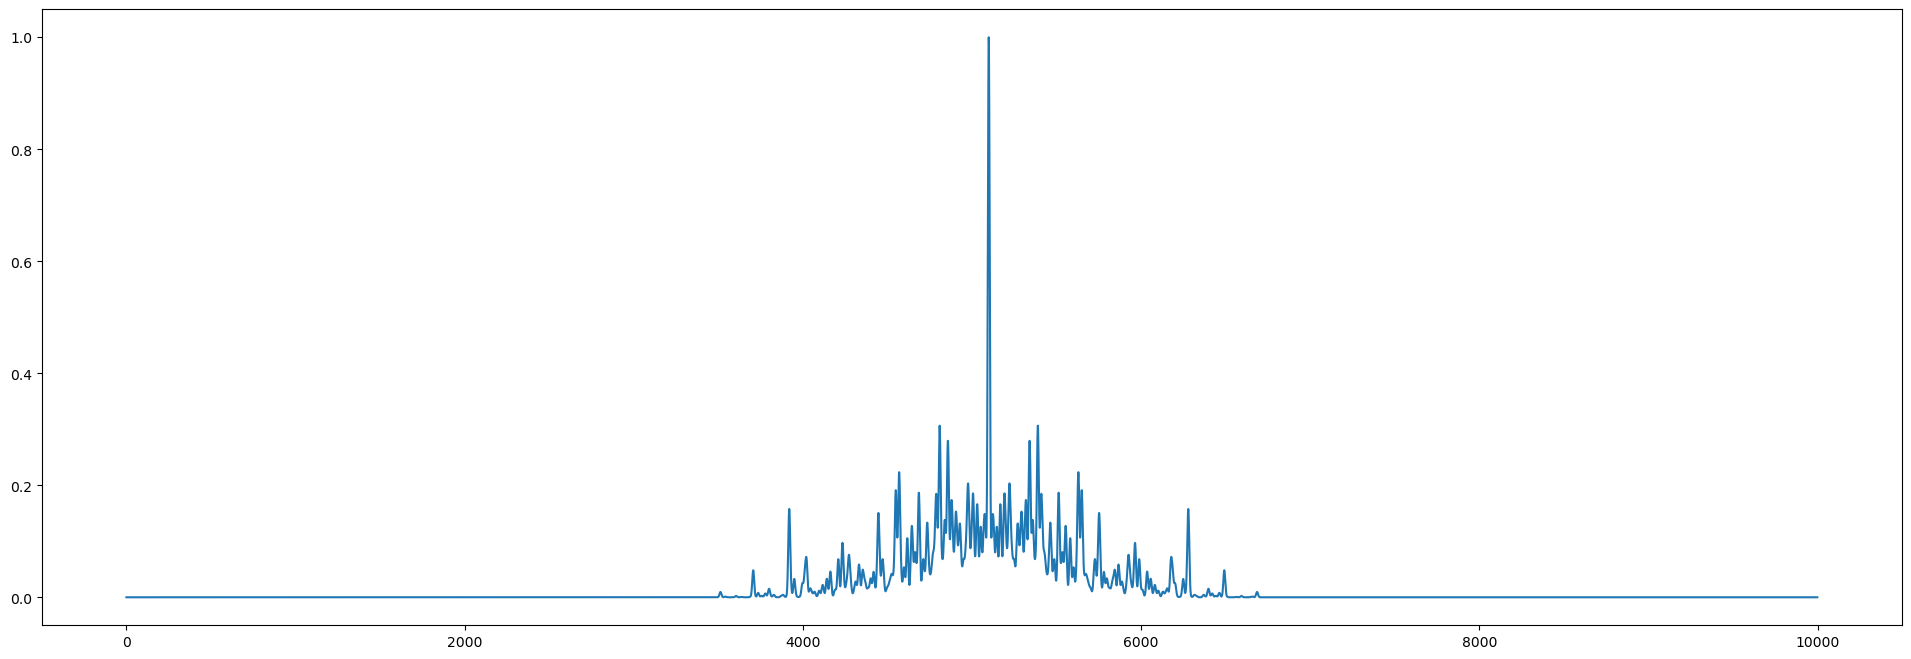

99


In [17]:

print (get_offset_x(np.roll(img[200,:],100), img[200,:], plot=True))

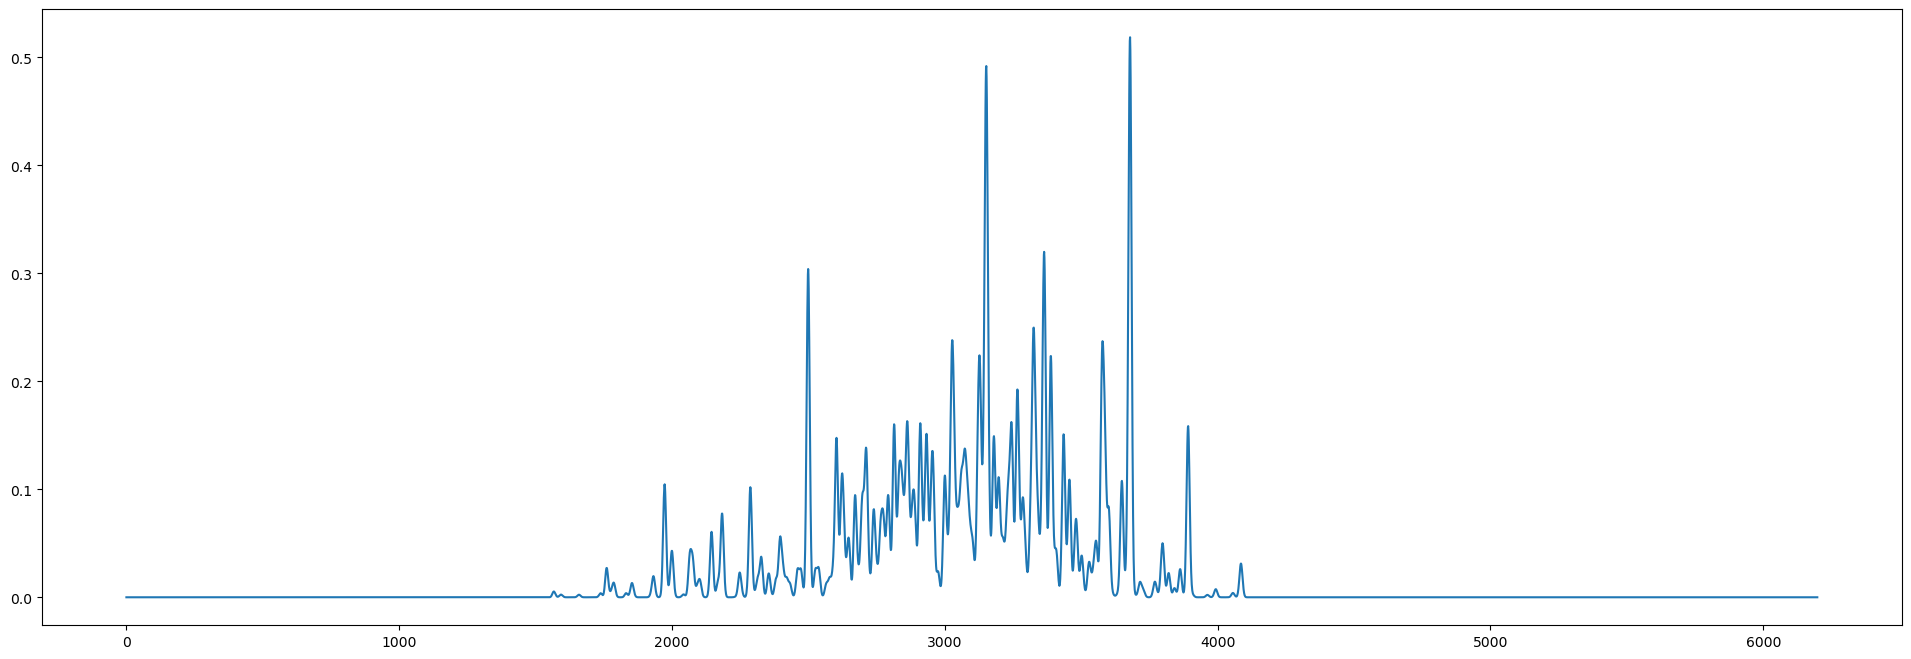

2479

In [19]:
shift = get_offset_x(raw[200,:], img[200,:], plot=True)
shift

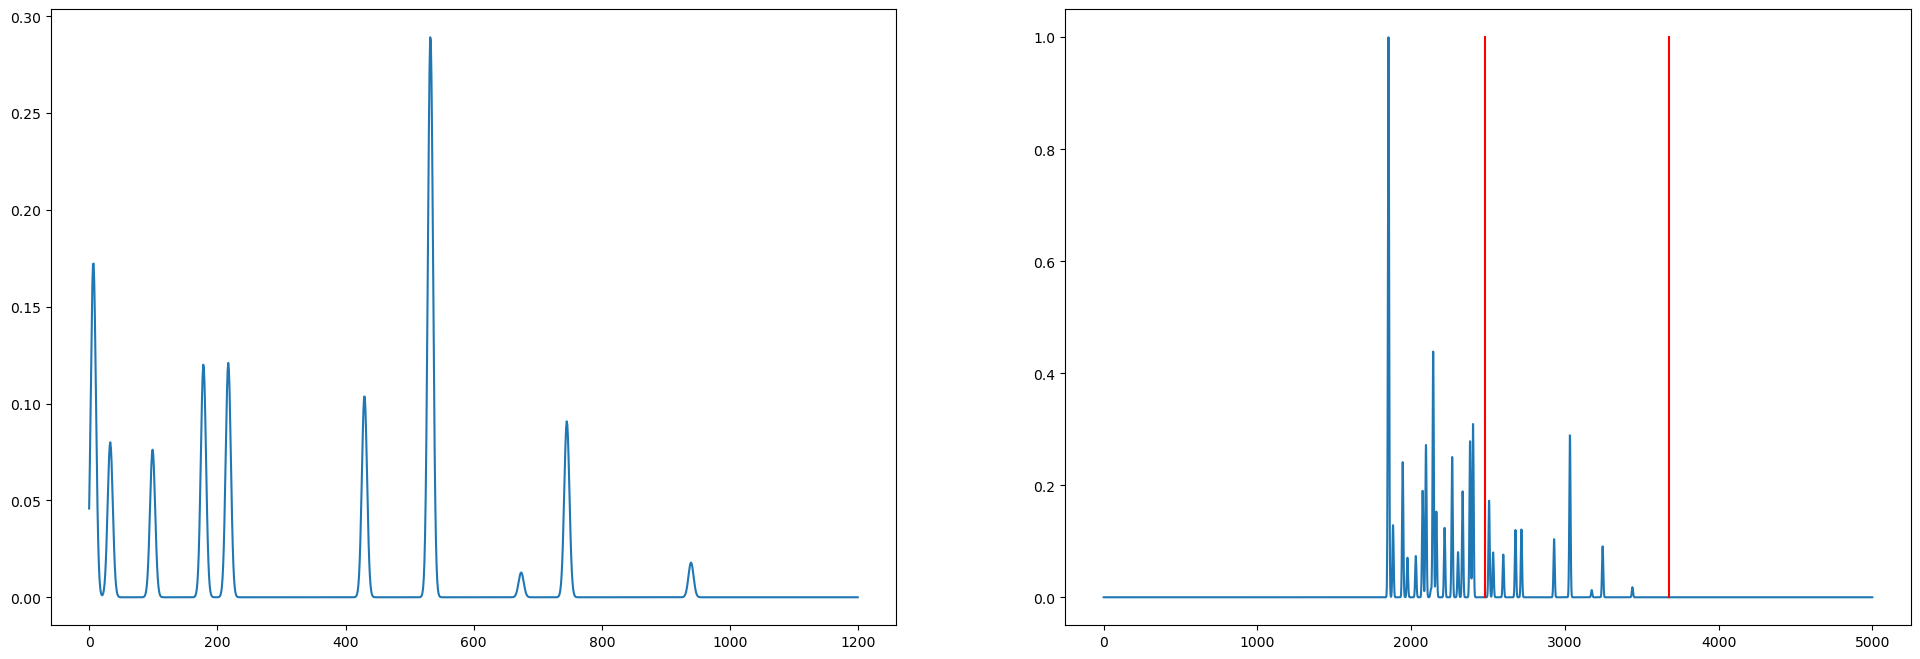

In [22]:
trace_reference = img[200,:]
trace_unknown = raw[200,:]
plt.rcParams['figure.figsize'] = FigureSize.NARROW
fig, axes = plt.subplots(1,2)
axes[0].plot(trace_unknown)
axes[1].plot(trace_reference)
axes[1].plot([shift,shift],[0,1], color='red')
axes[1].plot([shift+len(trace_unknown),shift+len(trace_unknown)],[0,1], color='red')

plt.show()

